<a href="https://colab.research.google.com/github/MSR806/DL/blob/master/DL_MP_Neuron%26Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [277]:
import sklearn.datasets
import numpy as np

#Load Dataset

In [278]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [279]:
type(breast_cancer)

sklearn.utils.Bunch

In [280]:
X = breast_cancer.data
Y = breast_cancer.target

In [281]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [282]:
type(X)

numpy.ndarray

In [283]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [284]:
import pandas as pd

In [285]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [286]:
data['class'] = breast_cancer.target

In [287]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [288]:
type(data)

pandas.core.frame.DataFrame

In [289]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [290]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [291]:
print(breast_cancer.target_names)  

['malignant' 'benign']


In [292]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#Train test split

In [293]:
from sklearn.model_selection import train_test_split

In [294]:
X = data.drop('class', axis=1)
Y = data['class']

In [295]:
type(X)

pandas.core.frame.DataFrame

In [296]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [297]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [298]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (426, 30) (143, 30)


In [299]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1)

In [300]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (512, 30) (57, 30)


In [301]:
print(Y.shape, Y_train.shape, Y_test.shape)

(569,) (512,) (57,)


In [302]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.64453125 0.47368421052631576


In [303]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y)

In [304]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [305]:
print(X.mean(), X_train.mean(), X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [306]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)

In [307]:
print(X.mean(), X_train.mean(), X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

#Binarisation of input

In [308]:
import matplotlib.pyplot as plt

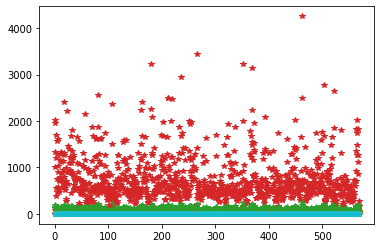

In [309]:
plt.plot(X_train, '*')
plt.show()

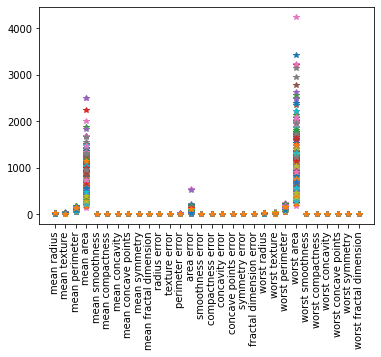

In [310]:
plt.plot(X_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [311]:
X_binarised_3_train = X_train['mean area'].map(lambda x:0 if x < 1000 else 1 )

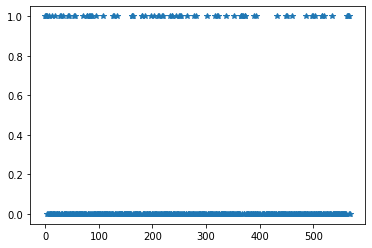

In [312]:
plt.plot(X_binarised_3_train, '*')
plt.show()

In [313]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

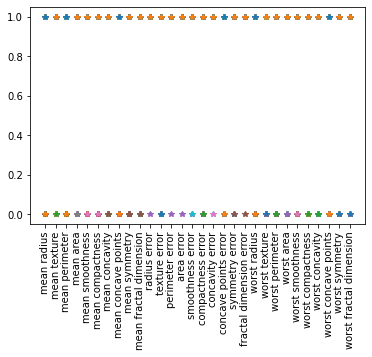

In [314]:
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [315]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

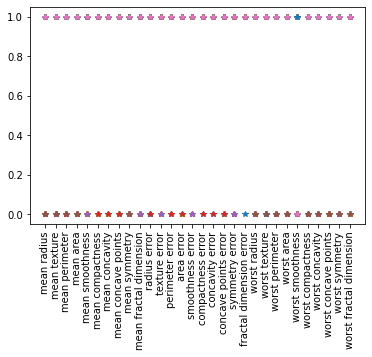

In [316]:
plt.plot(X_binarised_test.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [317]:
type(X_binarised_train)

pandas.core.frame.DataFrame

In [318]:
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [319]:
type(X_binarised_train)

numpy.ndarray

#MP_Neuron

In [320]:
from random import randint

In [321]:
b = 3

i = randint(0,X_binarised_train.shape[0])

x = np.sum(X_binarised_train[i, :])

if x >= b:
  print("This maybe maligant")
else:
  print("This may not maligant")

if Y_train[i] == 1:
  print("This is maligant")
else:
  print("This is not maligant")

This maybe maligant
This is not maligant


In [322]:
b = 3
Y_pred_train = []
acc_rows = 0
for x,y in zip(X_binarised_train, Y_train):
  Y_pred = (np.sum(x) >= b)
  Y_pred_train.append(Y_pred)
  acc_rows += (y==Y_pred)
print(acc_rows/X_binarised_train.shape[0])



0.626953125


In [323]:
print(X_binarised_train.shape[1] + 1)

31


In [324]:
for b in range(X_binarised_train.shape[1] + 1):
  Y_pred_train = []
  acc_rows = 0
  for x,y in zip(X_binarised_train, Y_train):
    Y_pred = (np.sum(x) >= b)
    Y_pred_train.append(Y_pred)
    acc_rows += (y==Y_pred)
  print(b,acc_rows, acc_rows/X_binarised_train.shape[0])


0 321 0.626953125
1 321 0.626953125
2 321 0.626953125
3 321 0.626953125
4 321 0.626953125
5 321 0.626953125
6 321 0.626953125
7 321 0.626953125
8 321 0.626953125
9 321 0.626953125
10 321 0.626953125
11 321 0.626953125
12 321 0.626953125
13 321 0.626953125
14 323 0.630859375
15 324 0.6328125
16 329 0.642578125
17 332 0.6484375
18 336 0.65625
19 340 0.6640625
20 344 0.671875
21 352 0.6875
22 359 0.701171875
23 371 0.724609375
24 387 0.755859375
25 402 0.78515625
26 419 0.818359375
27 433 0.845703125
28 435 0.849609375
29 417 0.814453125
30 389 0.759765625


In [325]:
from sklearn.metrics import accuracy_score

In [326]:
b = 28
Y_pred_test = []

for x in X_binarised_test:
  Y_pred = (np.sum(x) >= b)
  Y_pred_test.append(Y_pred)
accuracy = accuracy_score(Y_pred_test, Y_test)
print(b, accuracy)

28 0.7894736842105263


#MP_Neuron Class

In [327]:
class MPNeuron:
  def __init__(self):
    self.b = None
  
  def model(self, x):
    return (sum(x) >= self.b)

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y):
    accuracy = {}
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)

    best_b = max(accuracy, key= accuracy.get)
    self.b = best_b
    print("Optimal value of b is ",best_b)
    print("Highest accuracy is ", accuracy[best_b])
      

In [328]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train,Y_train)

Optimal value of b is  28
Highest accuracy is  0.849609375


In [329]:
mp_neuron.b

28

In [330]:
Y_pred_test = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_pred_test, Y_test)

In [331]:
print(accuracy_test)

0.7894736842105263


In [332]:
type(mp_neuron)

__main__.MPNeuron

#Perceptron

In [333]:
X_train = X_train.values
X_test = X_test.values

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y=0, \mbox{otherwise}$

In [347]:
class perceptron:

  def __init__(self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if (np.dot(self.w,x) >= self.b) else 0

  def predict(self, X):
    Y= []
    for x in X:
      result = self.model(x )
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y, epochs=1, lr =1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w += lr * x
          self.b += lr * 1
        elif y == 0 and y_pred == 1:
          self.w -= lr * x
          self.b -= lr * 1
      wt_matrix.append(list(self.w))
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if accuracy[i] > max_accuracy:
        max_accuracy = accuracy[i]
        chkpt_w = self.w
        chkpt_b = self.b

    self.b = chkpt_b
    self.w = chkpt_w

    print("The max accuracy is ",max_accuracy)
    plt.plot(*zip(*sorted(accuracy.items())))
    plt.ylim([0,1])
    plt.show()
    return np.array(wt_matrix)
    

In [348]:
perceptron = perceptron()

The max accuracy is  0.927734375


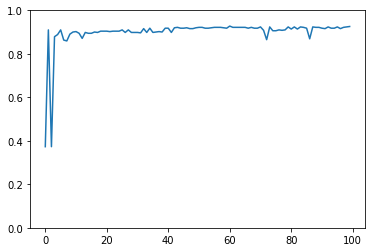

In [349]:
wt_mat = perceptron.fit(X_train, Y_train,100)

In [350]:
type(wt_mat)

numpy.ndarray

In [339]:
Y_pred = perceptron.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

0.9298245614035088


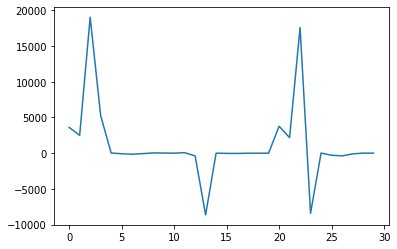

In [352]:
plt.plot(wt_mat[50,:])
plt.show()

In [353]:
%matplotlib inline

In [354]:
from matplotlib import animation, rc
from IPython.display import HTML

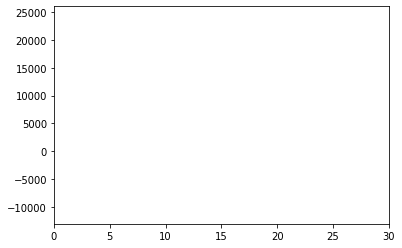

In [355]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_mat.shape[1]))
ax.set_ylim((-13000, 26000))

line, = ax.plot([], [], lw=2)

In [356]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_mat.shape[1]))
    y = wt_mat[i,:]
    line.set_data(x, y)
    return (line,)

In [358]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=50, blit=True)

In [359]:
HTML(anim.to_html5_video())